<class 'pandas.core.series.Series'>
   Description  Amount
7     CCY CONV    0.11
3     APPLE.CO    1.48
8     DAISO JA    2.16
2     AMZNPRIM    2.99
30    UNITY BY    3.83
21    MR COCON    5.30
19    KOUFU PT    6.20
27    SUBWAY -    8.10
33    www.anyw   10.00
29    TOAST BO   10.70
28    Spotify    10.98
32    fp*Food    12.90
22    NET*SUBW   13.60
0     7-ELEVEN   13.70
31    WOK HEY    13.80
18    KOPITIAM   16.80
26    SINGTEL    19.90
13    GIANT-MA   20.60
11    FR VIVO-   21.00
25    SHENGSIO   26.74
10    FINEST P   30.16
17    ICHIBAN    36.60
14    GIVING.S   40.00
5     ATOME* P   41.28
1     AMAZON S   46.09
23    NTUC FP    46.44
4     ATOME* M   53.30
15    GOJEK 90   58.30
6     BUS/MRT    70.63
16    Grab* A-   88.05
12    GARDENS   103.00
9     EzypaySG  105.00
24    NTUC Fai  110.23


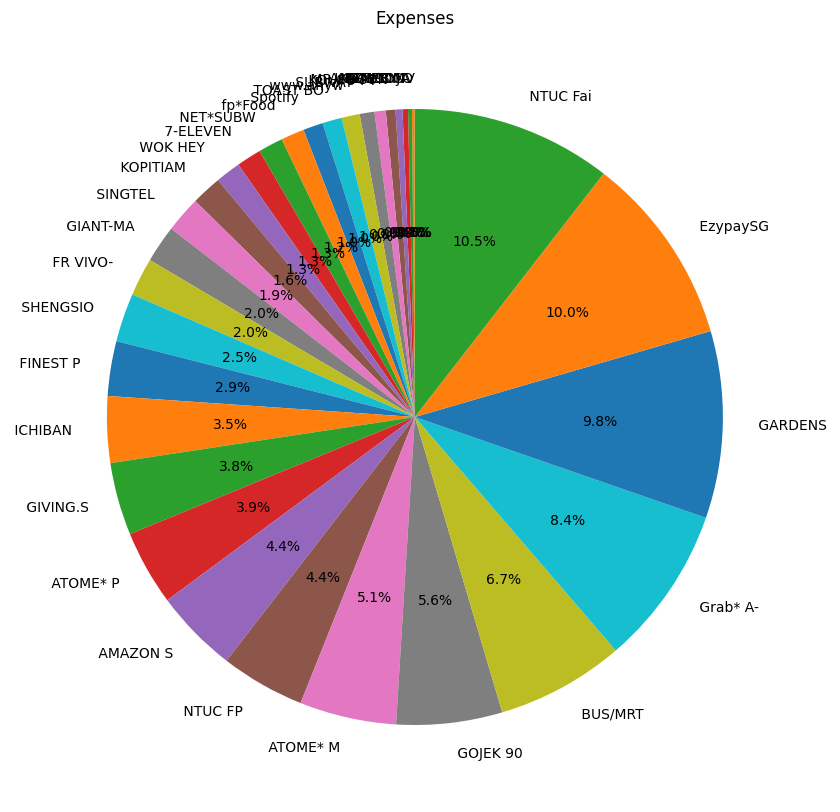

In [2]:
import tabula
import pandas as pd
import numpy as np
# from matplotlib import rc, pyplot as plt
import matplotlib.pyplot as plt
import random





# Read pdf into list of DataFrame
dfs = tabula.read_pdf("eStatement_Oct2023.pdf", pages='all', encoding='utf-8', guess=False, lattice=False, stream=True)

appended_data = []

for df in dfs[1:]:
    df3 = df.drop_duplicates();
    df4 = df3.dropna(axis=1, how='all');
    df5 = df4.dropna(axis=0, how='all');

    df6 = df5.map(lambda x: x.strip() if isinstance(x, str) else x)

    df6.columns = [*df6.columns[:-1], 'Amount']


    df6['Date']=df5['Unnamed: 0'].str.slice(stop=6)+' 2023'
    df6['Description']=df5['Unnamed: 0'].str.slice(start=6)
    df7 = df6.filter(['Date','Description','Amount'])

    df7['Date'] = pd.to_datetime(df7['Date'],format='%d %b %Y',errors='coerce')
    df7 = df7.dropna(subset=['Date'])
    df7['Amount'] = df7['Amount'].astype(str)
    df7['Amount'] = df7['Amount'].str.replace(r'[^0-9.]', '', regex=True)
    df7['Amount'] = pd.to_numeric(df7['Amount'], errors='coerce')

    appended_data.append(df7)
 
appended_data = pd.concat(appended_data).reset_index(drop=True)
appended_data = appended_data.groupby(appended_data['Description'].str[:9])['Amount'].sum().reset_index()

appended_data = appended_data.drop(appended_data.index[appended_data['Amount'] == 1487.73])
appended_data = appended_data.sort_values('Amount')

# appended_data.drop(appended_data[appended_data['Description'].str == "MONEYSEN"].index)

result_df = pd.DataFrame(appended_data, columns=['Description', 'Amount'])
result_df=result_df[result_df["Description"].str.contains("MONEYSEN")== False]

print(type(result_df['Description']))
print(result_df)


# report generation starts here 
labels = result_df['Description']
sizes = result_df['Amount']

plt.figure(figsize=(14, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Create a custom legend with labels and manually specified colors
legend_labels = labels
legend_colors = [(random.random(), random.random(), random.random(), 1) for _ in range(500)]


# Create a legend table with one column for labels and one column for colors
# legend_table_data = [[label, ''] for label in legend_labels]
# legend_table = plt.table(cellText=legend_table_data,
#                          loc='center',
#                          cellLoc='center',
#                          colColours=['lightgray', 'lightgray'],
#                          cellColours=[['lightgray', color] for color in legend_colors],
#                          bbox=[0.85, 0.1, 0.1, 0.5])

# Customize the appearance of the legend table
# legend_table.auto_set_font_size(False)
# legend_table.set_fontsize(14)
# legend_table.scale(1, 2)

# Remove axis labels and ticks
plt.axis('off')

 

plt.title('Expenses')
plt.show()


 